<a href="https://colab.research.google.com/github/spierscaleb004/4410-HW/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

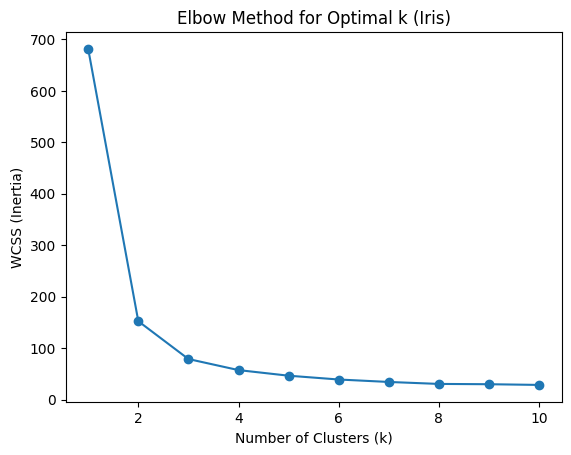

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training time: 70.23 seconds
Accuracy: 0.9154285714285715

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000


Confusion Matrix:
[[1282    1   11    0    1   13   22    4    7    2]
 [   0 1554    6    9    3    5    1    4   15    3]
 [   5   18 1235   19   13   14   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression WITH PCA (95% variance)
Training time: 59.87 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with PCA: 0.9217142857142857
Number of components kept: 330


In [9]:
# PART 1
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
x = iris.data

wcss = []
# inertia for each k
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
# plot the curve
plt.plot(range(1, 11), wcss, marker ='o')
plt.title('Elbow Method for Optimal k (Iris)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.savefig('elbow-1.jpg')
plt.show()



# PART 2
import time
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)

# split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with PCA
start = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000)
logisticRegr.fit(X_train_scaled, y_train)
end = time.time()
print(f"Training time: {end - start:.2f} seconds")


y_pred = logisticRegr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print ("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

pca = PCA(0.95)  # keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

logisticRegr_pca = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000)

start = time.time()
logisticRegr_pca.fit(X_train_pca, y_train)
end = time.time()

print("\nLogistic Regression WITH PCA (95% variance)")
print(f"Training time: {end - start:.2f} seconds")

logisticRegr.fit(X_train_pca, y_train)

y_pred_pca = logisticRegr_pca.predict(X_test_pca)
print("Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))
print("Number of components kept:", pca.n_components_)